# Twitter network analysis explore

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
# !ls "drive/Shareddrives/AV_Twitter_Project/Topic Modeling"
cwd = "drive/Shareddrives/AV_Twitter_Project/Topic Modeling"

In [ ]:
data_path = os.path.join(
    cwd, 
    "data/Link_Events_10_day/sentiment_analysis",
    "doc_topic_lda_8000.csv")

event = "Las Vegas Autonomous Shuttle Crash"
df = pd.read_csv(data_path, index_col=0)
df_event = df.loc[df["event_name"] == event]

print(f"columns: {df_event.columns}")
print(f"df shape: {df_event.shape}")
df

columns: Index(['tweet_id', 'text', 'author', 'receiver', 'date', 'depth', 'parent_id',
       'tokens', 'clean_tokens', 'num_tokens', 'event_name', 'event_id',
       'event_date', 'event_type', 'topic_0', 'topic_1', 'topic_2', 'topic_3',
       'topic_4', 'topic_5', 'topic', 'day_after_event', 'sentiment', 'theme'],
      dtype='object')
df shape: (4410, 24)


,tweet_id,text,author,receiver,date,depth,parent_id,tokens,clean_tokens,num_tokens,event_name,event_id,event_date,event_type,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic,day_after_event,sentiment,theme
1,5.165300e+17,@Nigeriaautopart do u have an idea how much it...,queenoluwa,nigeriaautopart,9/29/14 6:10,0,5.165130e+16,do have an idea how much it is to get water pu...,idea water pump toyota,4,Introduction of Tesla Autopilot,2014 Tesla Advancement,10/9/14,Good,0.020754,0.049225,0.030601,0.024185,0.846550,0.028686,4,-10,0.000000,Electric Vehicles
2,5.224190e+17,Audi tests driverless car technology at 190 mp...,ezautotransport,NaN,10/15/14 12:08,seed,5.224190e+16,audi tests driverless car technology at mph in...,audi test driverless car technology effort bri...,9,Introduction of Tesla Autopilot,2014 Tesla Advancement,10/9/14,Good,0.019517,0.073225,0.064907,0.820408,0.009133,0.012811,3,7,0.188562,Tech Companies
3,5.224190e+17,Audi tests driverless car technology at 190 mp...,carculturetv,NaN,10/15/14 12:08,seed,5.224190e+16,audi tests driverless car technology at mph in...,audi test driverless car technology effort bri...,9,Introduction of Tesla Autopilot,2014 Tesla Advancement,10/9/14,Good,0.009269,0.042480,0.034163,0.892145,0.009133,0.012811,3,7,0.188562,Tech Companies
4,5.224190e+17,Audi tests driverless car technology at 190 mp...,todayscarnews,NaN,10/15/14 12:07,seed,5.224190e+16,audi tests driverless car technology at mph in...,audi test driverless car technology effort bri...,10,Introduction of Tesla Autopilot,2014 Tesla Advancement,10/9/14,Good,0.050261,0.042480,0.023914,0.840904,0.019381,0.023059,3,7,0.180739,Tech Companies
5,5.224190e+17,Audi tests driverless car technology at 190 mp...,mtecgroup,NaN,10/15/14 12:07,seed,5.224190e+16,audi tests driverless car technology at mph in...,audi test driverless car technology effort bri...,9,Introduction of Tesla Autopilot,2014 Tesla Advancement,10/9/14,Good,0.010210,0.046796,0.037634,0.869897,0.010061,0.025402,3,7,0.180739,Tech Companies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102862,1.097840e+18,Audi to spend nearly $16 billion on self-drivi...,meganwalker_91,NaN,2/19/19 7:41,seed,1.097840e+17,audi to spend nearly billion on self driving c...,audi spend self driving car tech electrification,7,Confused Tesla incident in February,2019 New Jersey Tesla Minor Crash,2/11/19,Minor,0.014687,0.051075,0.151572,0.731653,0.014472,0.036540,3,8,0.000000,Tech Companies
102863,1.097840e+18,"No, he probably complained the autopilot veere...",trumpery45,schristakos,2/19/19 7:44,0,1.089430e+17,no he probably complained the autopilot veered...,complained autopilot veered road,4,Confused Tesla incident in February,2019 New Jersey Tesla Minor Crash,2/11/19,Minor,0.800959,0.072172,0.030601,0.024185,0.020450,0.051633,0,8,0.237171,Accident
102864,1.097840e+18,Autonomous vehicles may one day kill car insur...,shwinvest,NaN,2/19/19 7:46,seed,1.097840e+17,autonomous vehicles may one day kill car insur...,autonomous vehicle day kill car insurance know,7,Confused Tesla incident in February,2019 New Jersey Tesla Minor Crash,2/11/19,Minor,0.095885,0.619457,0.054135,0.163271,0.046951,0.020301,1,8,-0.041603,Fault & Safety
102865,1.097840e+18,Glad that wasn't how my test drive ended,nibory,domenick_y,2/19/19 7:51,0,1.097620e+17,glad that was not how my test drive ended,glad test drive ended,4,Confused Tesla incident in February,2019 New Jersey Tesla Minor Crash,2/11/19,Minor,0.020754,0.554063,0.168284,0.093027,0.020450,0.143422,1,8,0.250000,Fault & Safety


In [ ]:
# filter non replys
df_reply = df_event.loc[df_event["receiver"].isnull() == False]
print(f"replay df shape: {df_reply.shape}")

replay df shape: (1422, 24)


In [ ]:
# random sample tweets
num_samples = 100
sample_id = np.random.choice(np.arange(df_event.shape[0]), num_samples, replace=False)

df_sample = df_event.iloc[sample_id]
print(f"random sample df shape: {df_sample.shape}")

random sample df shape: (100, 24)


In [ ]:
# build adjacency matrix
def get_adj(df, source, target):
    sources = df[source].dropna().tolist()
    targets = df[target].dropna().tolist()
    nodes = list(set(sources + targets))
    
    adj = np.zeros((len(nodes), len(nodes)))
    for k in tqdm(range(df.shape[0])):
        source_ = df[source].iloc[k]
        target_ = df[target].iloc[k]
        if not str(target_) == "nan":
            adj[nodes.index(source_), nodes.index(target_)] += 1 
    return adj, nodes

adj, nodes = get_adj(df_reply, "author", "receiver")
print(f"adj density: {np.sum(adj > 0)/np.prod(adj.shape)}")


adj density: 0.0004564297338744783


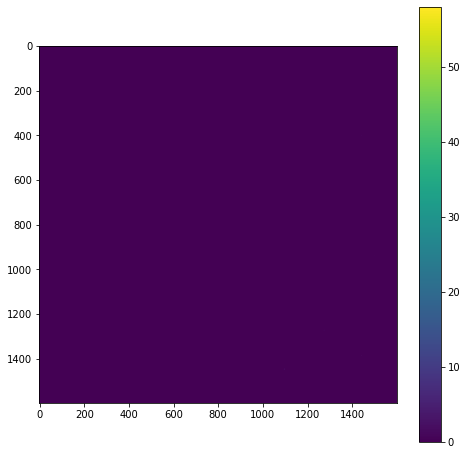

max adj: 58.0
source: charlesmrenshaw
target: 1029klite


In [ ]:
# plot adjacency matrix
fig, ax = plt.subplots(figsize=(8, 8))
p = ax.imshow(adj)
fig.colorbar(p, ax=ax)
plt.show()

print(f"max adj: {adj.max()}")
print(f"source: {nodes[np.where(adj == adj.max())[0][0]]}")
print(f"target: {nodes[np.where(adj == adj.max())[1][0]]}")

In [ ]:
# degree analysis
G = nx.from_pandas_edgelist(df_event, "author", "receiver")
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)[1:]
dmax = max(degree_sequence)
print(f"max degree: {dmax} probably nan")

max degree: 30 probably nan


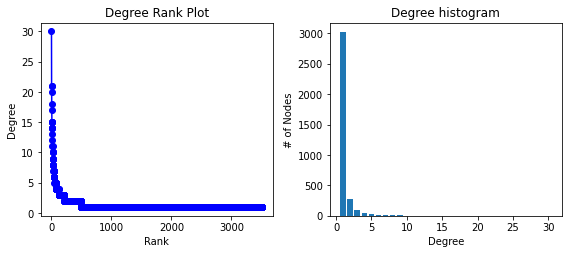

In [ ]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# plot network
# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
# plot reply graph
G = nx.from_pandas_edgelist(df_reply, "author", "receiver")
pos = nx.spring_layout(G)

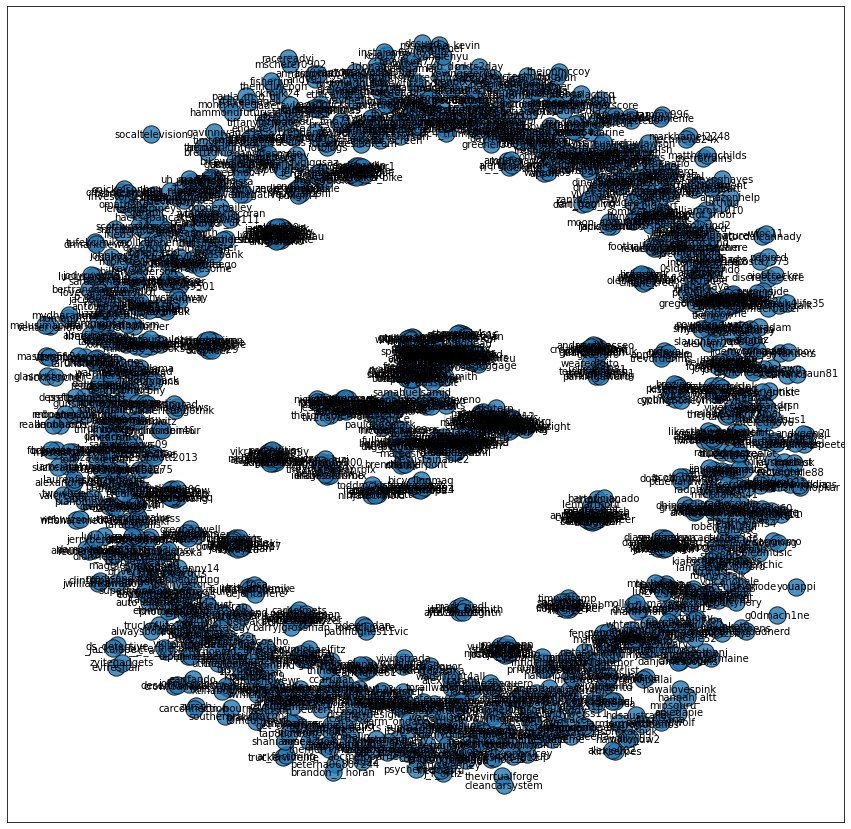

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor("k")
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

plt.show()